<a href="https://www.kaggle.com/code/orestasdulinskas/news-article-classification?scriptVersionId=161959061" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![Newspapers](https://study.com/cimages/multimages/16/newspaper4211527008062946561.jpg)

# News Article Classification
---
The project revolves around a text document classification dataset comprising 2225 news articles categorized into five distinct classes: politics, sport, tech, entertainment, and business. With the aim of enhancing document organization and retrieval, this dataset presents an opportunity for document classification and clustering tasks. By leveraging machine learning algorithms and natural language processing techniques, the project seeks to develop models capable of accurately categorizing and grouping news articles based on their content. This endeavor not only facilitates efficient information retrieval but also holds potential for uncovering insights into the underlying patterns and themes prevalent in the dataset.

# Data Cleaning
---

In [1]:
import pandas as pd

path = r'/kaggle/input/text-classification-documentation/df_file.csv'
df = pd.read_csv(path)
df.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [2]:
df.info() # Summary of DataFrame information

print('\nNumber of unique values in each column')
for i in df.columns:
    print(f'{i} - {df[i].nunique()}')

print('\nNumber of missing values in each column\n', df.isnull().sum())

print('\nNumber of duplicated rows\n', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB

Number of unique values in each column
Text - 2127
Label - 5

Number of missing values in each column
 Text     0
Label    0
dtype: int64

Number of duplicated rows
 98


In [3]:
# Dropping duplicate rows
df.drop_duplicates(ignore_index = True, inplace=True)

print('Length of the dataset after removing duplicate rows:', len(df))

Length of the dataset after removing duplicate rows: 2127


In [4]:
# Print the unique values and the percentage of each label
print('Distribution of the Labels in the dataset')
print(df['Label'].unique())
for i in range(len(df['Label'].unique())):
    print(df['Label'].unique()[i],' - ', round(df['Label'].value_counts()[i]/len(df) * 100,2), '% of the dataset')

Distribution of the Labels in the dataset
[0 1 2 3 4]
0  -  18.95 % of the dataset
1  -  23.74 % of the dataset
2  -  16.31 % of the dataset
3  -  17.35 % of the dataset
4  -  23.65 % of the dataset


#### Summary

There are no "Null" values, so no need to replace anything.

Dataset had 98 duplicated rows that have been dropped.

Distribution of labels ranges between 17% - 24% which are acceptable.

# Exploratory Data Analysis
---

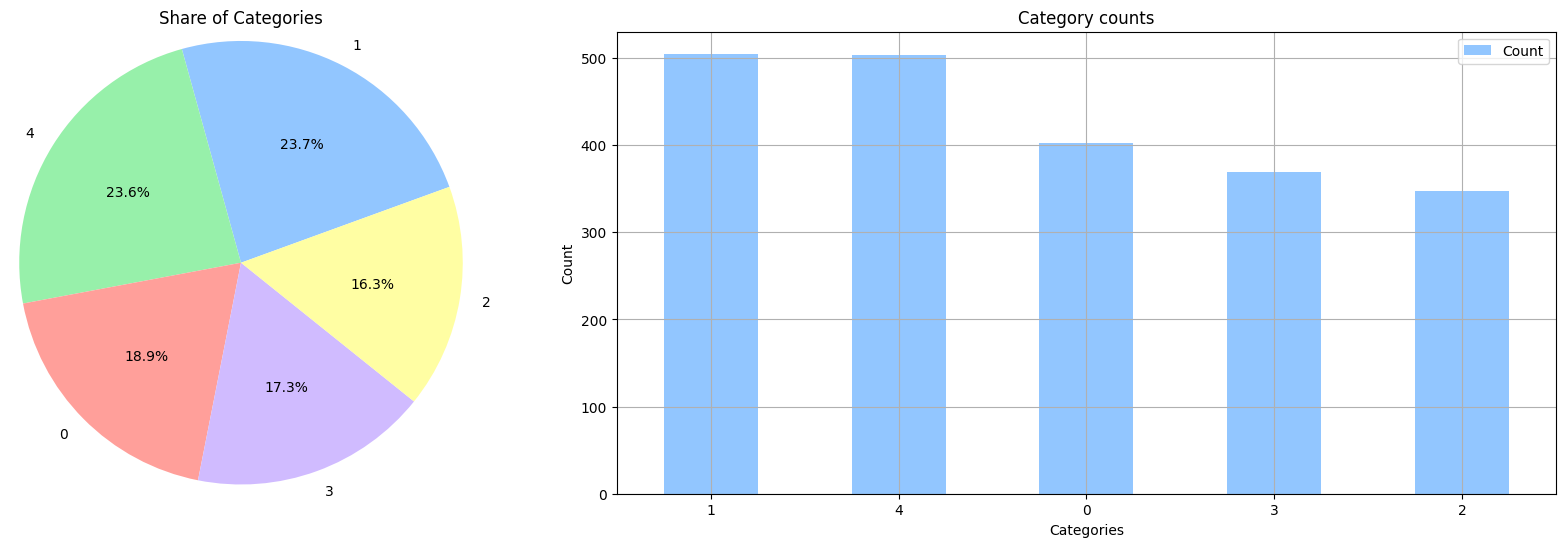

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')

fig, axs = plt.subplots(1, 2, figsize=(20, 6), gridspec_kw={'width_ratios': [1, 2]})

# Pie Chart
ax1 = axs[0]
subject = df['Label'].value_counts().reset_index(name='Count')
ax1.pie(subject['Count'], labels=subject['Label'], autopct='%1.1f%%', radius=1.2, startangle=20)
ax1.set_title(f'Share of Categories')

# Bar Chart
ax2 = axs[1]
subject.plot(kind='bar', x='Label', ax=ax2)
ax2.set_title('Category counts')
ax2.set_xlabel('Categories')
ax2.set_ylabel('Count')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.grid(True)

plt.show()

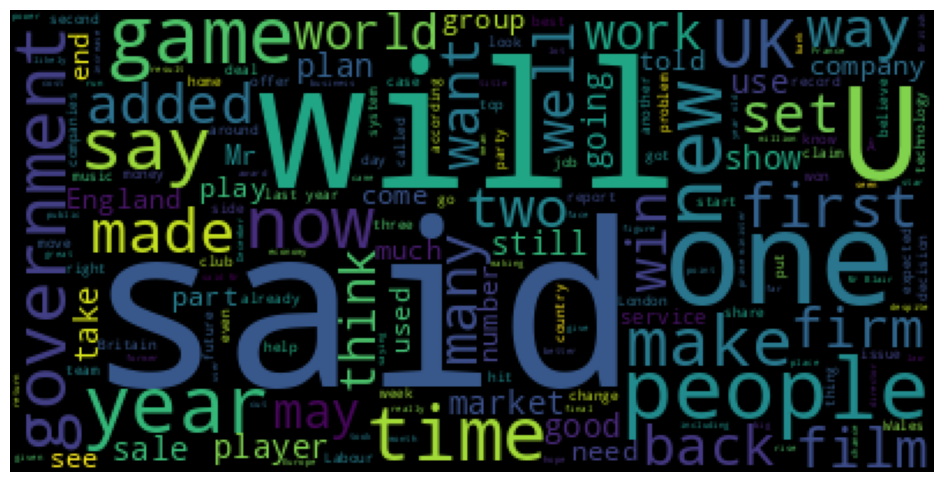

In [6]:
from wordcloud import WordCloud, STOPWORDS

all_text = " ".join(df['Text'])

wc = WordCloud(stopwords = STOPWORDS).generate(all_text)

plt.figure(figsize = (20,6))
plt.imshow(wc)
plt.axis('off')
plt.show()


Longest Sequence before preprocessing: 4432



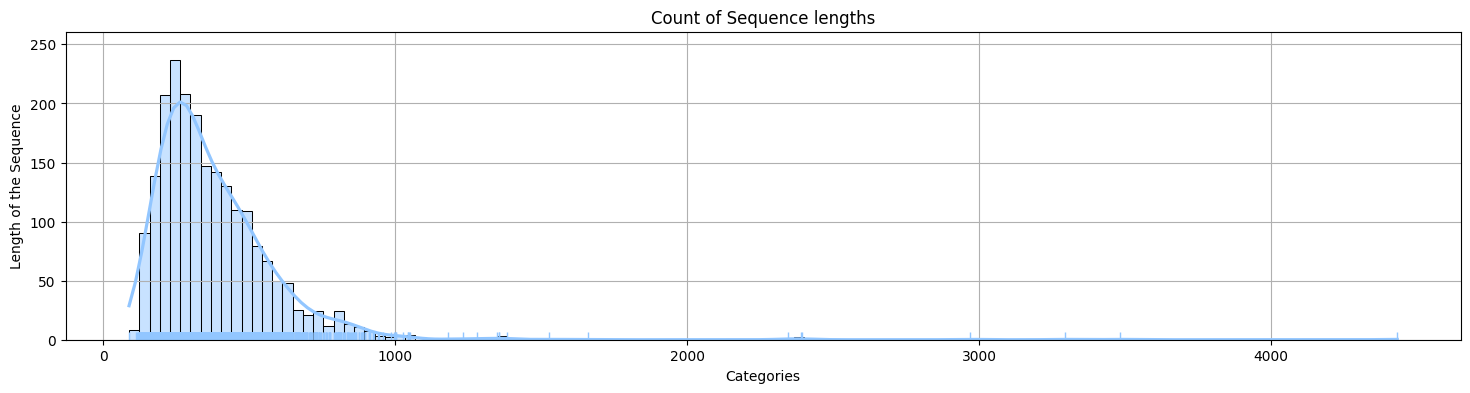

In [7]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

seq_len = []

for txt in df.Text:
    seq_len.append(len(txt.split()))
    
print(f'\nLongest Sequence before preprocessing: {max(seq_len)}\n')
plt.figure(figsize = (18, 4))
sns.histplot(seq_len, kde = True, line_kws = {'linewidth': 2.3})
sns.rugplot(seq_len)
plt.title('Count of Sequence lengths')
plt.xlabel('Categories')
plt.ylabel('Length of the Sequence')
plt.grid(True)
plt.show()

#### Summary

The dataset is positively skewed with majority of articles bellow 500 words and the outliers reaching over 4000 words

# Pre-Processing
---

#### Loading English model for NLP tasks

In [8]:
import spacy

nlp = spacy.load("en_core_web_sm")

#### Defining text preprocessing function

In [9]:
import re

def preprocess_text(txt:str):
    
    txt = re.sub('[^a-zA-Z]', ' ', txt) # Replace any non-alphabetic characters with space
    txt = txt.lower() # Convert text to lowercase
    txt = " ".join(txt.split()) # Remove any extra spaces
    
    doc = nlp(txt) # Tokenize the text
    
    tokens_filtered = []
    
    # Iterate through tokens and appent to list if its not stop word or punctuation mark
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        tokens_filtered.append(token.lemma_)
        
    return " ".join(tokens_filtered)

#### Applying text preprocessing on article texts

In [10]:
df['prep_text'] = df['Text'].apply(preprocess_text)
df.head()

,Text,Label,prep_text
0,Budget to set scene for election\n \n Gordon B...,0,budget set scene election gordon brown seek ec...
1,Army chiefs in regiments decision\n \n Militar...,0,army chief regiment decision military chief ex...
2,Howard denies split over ID cards\n \n Michael...,0,howard deny split d card michael howard deny s...
3,Observers to monitor UK election\n \n Minister...,0,observer monitor uk election minister invite i...
4,Kilroy names election seat target\n \n Ex-chat...,0,kilroy name election seat target ex chat host ...


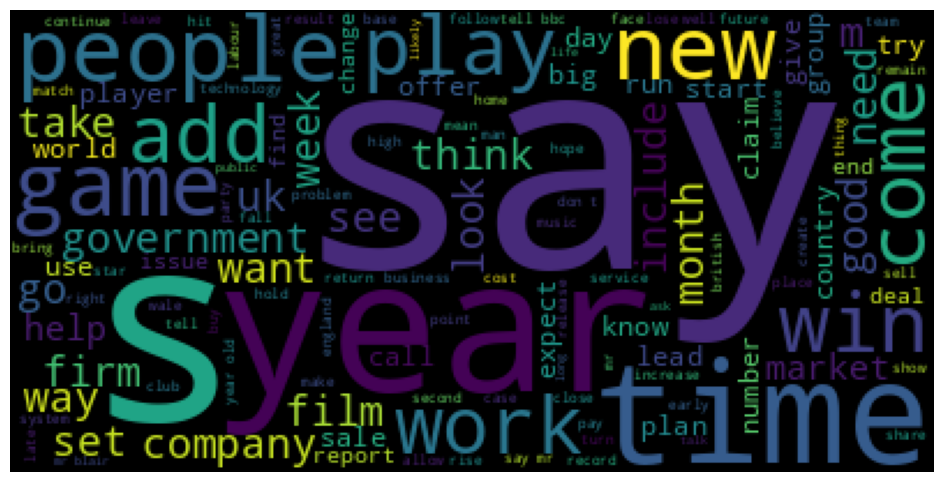

In [11]:
all_text = " ".join(df['prep_text'])

wc = WordCloud(stopwords = STOPWORDS).generate(all_text)

plt.figure(figsize = (20,6))
plt.imshow(wc)
plt.axis('off')
plt.show()


Longest Sequence before preprocessing: 2013



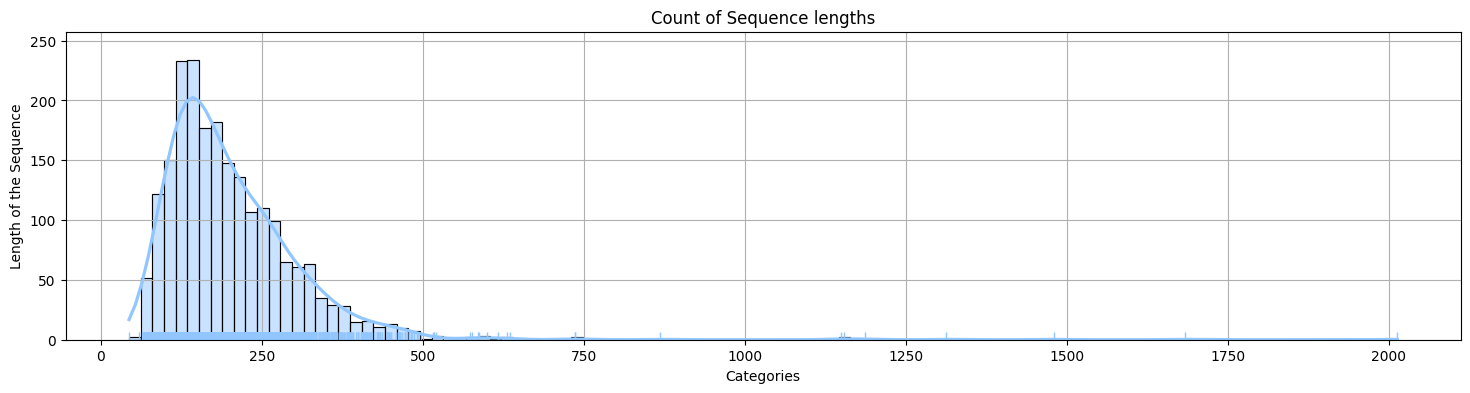

In [12]:
seq_len = []

for txt in df.prep_text:
    seq_len.append(len(txt.split()))
    
print(f'\nLongest Sequence before preprocessing: {max(seq_len)}\n')
plt.figure(figsize = (18, 4))
sns.histplot(seq_len, kde = True, line_kws = {'linewidth': 2.3})
sns.rugplot(seq_len)
plt.title('Count of Sequence lengths')
plt.xlabel('Categories')
plt.ylabel('Length of the Sequence')
plt.grid(True)
plt.show()

After preprocessing the text articles, the sequence lengths were cut about in half, with majority of articles having the length of less than 250 words and the longest sequence reaching over 2000 words.

#### Converting text to TF-IDF features

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# Transform preprocessed text into TF-IDF features
features = vectorizer.fit_transform(df['prep_text']).toarray()

#### Finding most corelated unigrams and bigrams

In [14]:
from sklearn.feature_selection import chi2
import numpy as np

categories = {'Politics':0,'Sport':1, 'Technology':2,'Entertainment':3,'Business':4}

for category, id in sorted(categories.items()):
    features_chi2 = chi2(features, df['Label'] == id) # Get chi-squared statistics and p-values for each feature
    indices = np.argsort(features_chi2[0]) # Sort in ascending order
    feature_names = np.array(vectorizer.get_feature_names_out())[indices] # Convert feature names and reorder by indices
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1] # List features names composed of one word
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2] # List features names composed of two word
    print("\n%s:" %(category))
    print(" - Most Correlated Unigrams: %s" %(', '.join(unigrams[-10:])))
    print(" - Most Correlated Bigrams: %s" %(', '.join(bigrams[-5:])))


Business:
 - Most Correlated Unigrams: stock, price, analyst, market, profit, economy, oil, growth, bank, bn
 - Most Correlated Bigrams: oil price, economic growth, analyst say, stock market, bn bn

Entertainment:
 - Most Correlated Unigrams: festival, actress, band, album, singer, oscar, actor, star, award, film
 - Most Correlated Bigrams: good film, win good, los angeles, film festival, box office

Politics:
 - Most Correlated Unigrams: liberal, mp, secretary, conservative, minister, party, blair, election, tory, labour
 - Most Correlated Bigrams: prime minister, lib dem, general election, tony blair, mr blair

Sport:
 - Most Correlated Unigrams: game, team, chelsea, rugby, season, champion, injury, coach, match, cup
 - Most Correlated Bigrams: world number, bbc sport, world cup, australian open, grand slam

Technology:
 - Most Correlated Unigrams: device, digital, online, microsoft, pc, mobile, software, technology, computer, user
 - Most Correlated Bigrams: hard drive, high defini

#### Splitting data into random train and test sets

In [15]:
from sklearn.model_selection import train_test_split

X = features
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    stratify = y)

print(f'X train total: {len(X_train)}')
print(f'X test total: {len(X_test)}')

X train total: 1488
X test total: 639


#### Distribution of training dataset

In [16]:
# Print the unique values and the percentage of each in Label in training data
print('Distribution of the Labels in the training dataset')
print(y_train.unique())
for i in range(len(y_train.unique())):
    print(y_train.unique()[i],' - ', round(y_train.value_counts()[i]/len(y_train) * 100,2), '% of the dataset')

Distribution of the Labels in the training dataset
[4 2 1 3 0]
4  -  18.95 % of the dataset
2  -  23.72 % of the dataset
1  -  16.33 % of the dataset
3  -  17.34 % of the dataset
0  -  23.66 % of the dataset


#### Distribution of test dataset

In [17]:
# Print the unique values and the percentage of each in Label in test data
print('Distribution of the Labels in the test dataset')
print(y_test.unique())
for i in range(len(y_test.unique())):
    print(y_test.unique()[i],' - ', round(y_test.value_counts()[i]/len(y_test) * 100,2), '% of the dataset')

Distribution of the Labels in the test dataset
[4 1 3 0 2]
4  -  18.94 % of the dataset
1  -  23.79 % of the dataset
3  -  16.28 % of the dataset
0  -  17.37 % of the dataset
2  -  23.63 % of the dataset


# Training and Validation
---

#### Defining Classifier models with its respective hyperparameters

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

classifiers = {
    "LogisiticRegression": {'model':LogisticRegression()},
    
    "DecisionTreeClassifier": {'model':DecisionTreeClassifier()},
    
    "Random Forest Classifier": {'model':RandomForestClassifier()},
    
    "Naive Bayes": {'model':GaussianNB()},
    
    "Support Vector Classifier": {'model':SVC()},
    
    "Gradient Boosting Classifier": {'model':GradientBoostingClassifier()},
    
    "Multi-layer Perceptron Classifier": {'model':MLPClassifier()},
    
    "XGBoost Classifier": {'model':XGBClassifier(objective='multi:softmax')}
}

#### Training each model

Training LogisticRegression
LogisticRegression has a training score of 97.58 % accuracy score 

Training DecisionTreeClassifier
DecisionTreeClassifier has a training score of 78.83 % accuracy score 

Training RandomForestClassifier
RandomForestClassifier has a training score of 95.23 % accuracy score 

Training GaussianNB
GaussianNB has a training score of 94.35 % accuracy score 

Training SVC
SVC has a training score of 97.51 % accuracy score 

Training GradientBoostingClassifier
GradientBoostingClassifier has a training score of 94.02 % accuracy score 

Training MLPClassifier
MLPClassifier has a training score of 97.45 % accuracy score 

Training XGBClassifier
[0]	validation_0-merror:0.14241
[1]	validation_0-merror:0.12833
[2]	validation_0-merror:0.10485
[3]	validation_0-merror:0.09546
[4]	validation_0-merror:0.09546
[5]	validation_0-merror:0.07825
[6]	validation_0-merror:0.07512
[7]	validation_0-merror:0.06573
[8]	validation_0-merror:0.06416
[9]	validation_0-merror:0.05947
[10]	vali

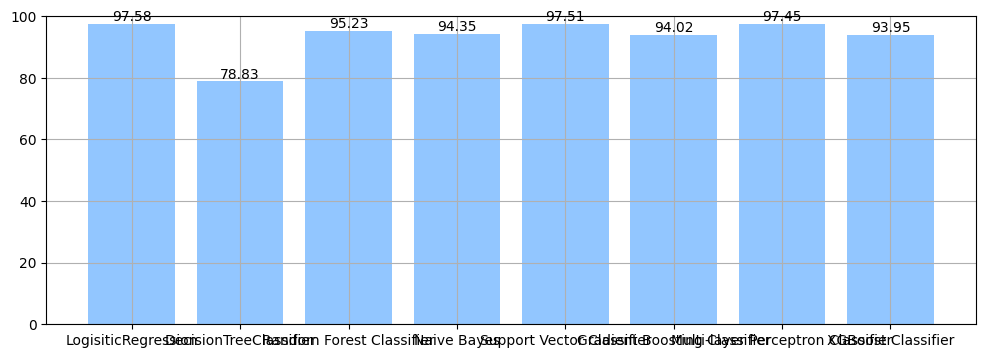

In [19]:
from sklearn.model_selection import cross_val_score

model_scores = {}
for key, classifier in classifiers.items(): # Loop through each classifier
    print('Training', classifier['model'].__class__.__name__)
    try:
        classifier['model'].fit(X_train, y_train, # Fit training data to the classifier
                early_stopping_rounds=10,
                eval_metric='merror',
                eval_set=[(X_test, y_test)])
    except TypeError:
        classifier['model'].fit(X_train, y_train) # If classifier does not accept parameters, it fits training data to classifier without them
    training_score = cross_val_score(classifier['model'], X_train, y_train, cv=5, scoring='accuracy') # Get cross validation score
    model_scores[key] = round(training_score.mean() * 100, 2) # Assign the mean training score to a dictionary
    print(classifier['model'].__class__.__name__, "has a training score of", round(training_score.mean() * 100, 2), "% accuracy score \n")

# Plot models scores
fig, ax = plt.subplots(figsize=(12, 4))
bars = ax.bar(model_scores.keys(), model_scores.values())
ax.bar_label(bars, label_type="edge")
plt.ylim(0, 100)
plt.grid(True)
plt.show()

#### Training the best performing model and using it on the test set

In [20]:
classifiers[max(model_scores, key=model_scores.get)]['model'].fit(X_train, y_train)
y_pred = classifiers['LogisiticRegression']['model'].predict(X_test)

#### Classification performance report

In [21]:
from sklearn import metrics

# Classification report
print('CLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, target_names= categories.keys()))

CLASSIFICATIION METRICS

               precision    recall  f1-score   support

     Politics       0.98      0.99      0.99       121
        Sport       0.99      0.99      0.99       152
   Technology       0.97      0.97      0.97       104
Entertainment       1.00      0.98      0.99       111
     Business       0.98      0.99      0.98       151

     accuracy                           0.99       639
    macro avg       0.99      0.99      0.99       639
 weighted avg       0.99      0.99      0.99       639



#### Confusion Matrix of the classification

<function matplotlib.pyplot.show(close=None, block=None)>

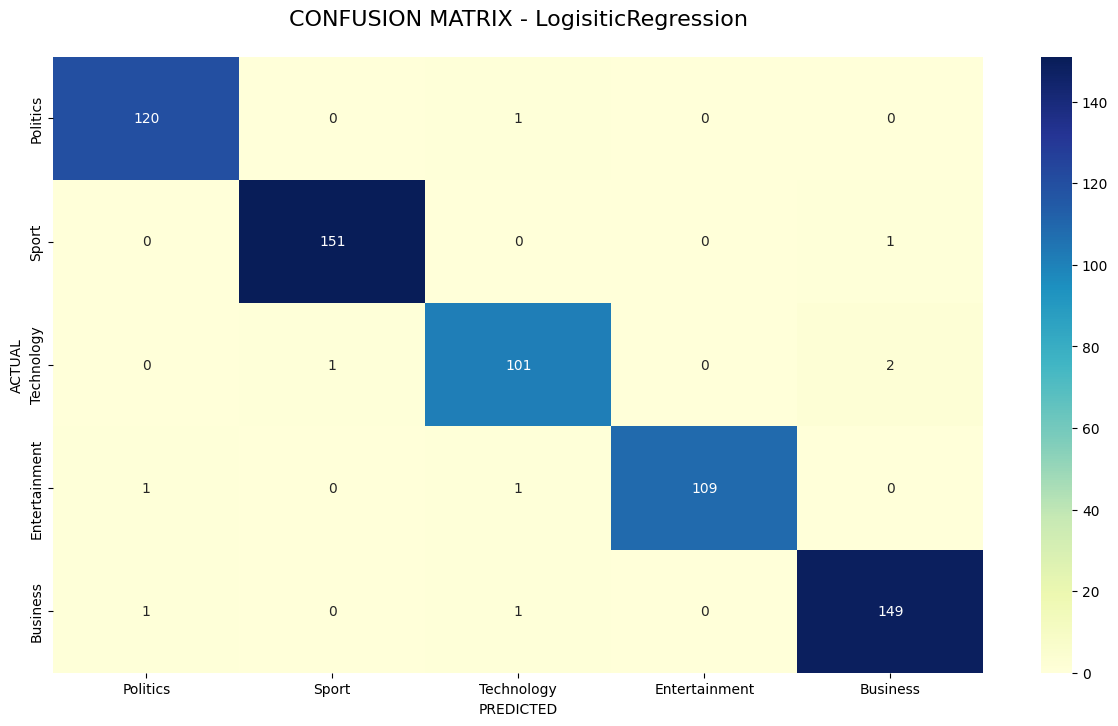

In [22]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(conf_mat, annot=True, cmap='YlGnBu', fmt='d',
            xticklabels=categories.keys(), 
            yticklabels=categories.keys())
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
plt.title(f"CONFUSION MATRIX - {max(model_scores, key=model_scores.get)}\n", size=16)
plt.show